In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import imgkit
import json
import numpy as np
from pprint import pprint
from PIL import Image

In [365]:
image_np = imgkit.from_file('signup-full-det.html', False, options={'width': 360, 'format': 'png'})

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [363]:
help(imgkit.from_file)

Help on function from_file in module imgkit.api:

from_file(filename, output_path, options=None, toc=None, cover=None, css=None, config=None, cover_first=None)
    Convert HTML file/files to IMG file/files
    
    :param filename: path of HTML file or list with paths or file-like object
    :param output_path: path to output PDF file/files. False means file will be returned as string
    :param options: (optional) dict with wkhtmltopdf global and page options, with or w/o '--'
    :param toc: (optional) dict with toc-specific wkhtmltopdf options, with or w/o '--'
    :param cover: (optional) string with url/filename with a cover html page
    :param css: style of input
    :param config: (optional) instance of imgkit.config.Config()
    :param cover_first: (optional) if True, cover always precedes TOC
    :return: True when success



In [366]:
nparr = np.fromstring(image_np, np.uint8)
img_np = cv2.imdecode(nparr, cv2.IMREAD_UNCHANGED) # cv2.IMREAD_COLOR in OpenCV 3.1


/home/mr-x/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


In [367]:
img_np.shape

(9262, 360, 4)

In [256]:
img.shape

(9262, 360, 4)

In [373]:
img[300][50]

array([255, 255, 255, 255], dtype=uint8)

In [41]:
img = cv2.imread('out1.png', cv2.IMREAD_UNCHANGED)
a = {"insights":[{"scrollPos":0,"endTime":37458},{"scrollPos":582,"endTime":16883},{"scrollPos":1223,"endTime":14337},{"scrollPos":2424,"endTime":481},{"scrollPos":3788,"endTime":417},{"scrollPos":5373,"endTime":417},{"scrollPos":6772,"endTime":516}],"dimensionX":360,"dimensionY":640}


col_values = np.zeros(img.shape[0])
for item in a['insights']:
    col_values[item['scrollPos']:max((item['scrollPos'] + a['dimensionY']), img.shape[0])] += item['endTime']

max_intensity = np.amax(col_values)

col_values /= max_intensity

# set levels
# unique = np.unique(col_values)
# unique.sort()

# for i in range(len(unique)):
#     col_values[col_values == unique[i]] = i


# col_values = (col_values / max(len(unique-1), 1))
temp_col_values = col_values.copy()
temp_col_values = cv2.merge([temp_col_values * 255, temp_col_values * 255, temp_col_values * 255, np.ones(temp_col_values.shape) * 255])
temp_col_values = np.repeat(temp_col_values, img.shape[1], axis=1)
temp_col_values = temp_col_values.astype(np.uint8)
print(img.dtype)
print(temp_col_values.dtype)
print(temp_col_values.shape)
print(img.shape)
# temp_col_values = cv2.cvtColor(temp_col_values,cv2.COLOR_GRAY2RGB)
# col_values = 1 - col_values
# added = np.zeros(img.shape)

# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         if img[i,j][0] in range(250, 255) and img[i,j][1] in range(250, 255) and img[i,j][2] in range(250, 255) and img[i,j][3] in range(250, 255):
#             added[i,j] = temp_col_values[i, j]
#         else:
#             added[i,j] = img[i,j]

added = cv2.addWeighted(img, 0.6, temp_col_values, 0.4, 0)

uint8
uint8
(9262, 360, 4)
(9262, 360, 4)


In [42]:
cv2.imwrite('gra.jpg', temp_col_values)

True

In [346]:
unique

array([37458., 54341., 68678., 69159., 69576., 69993., 70509.])

In [335]:
added.shape

(9262, 360, 4)

In [355]:
cv2.imwrite('fin.png', added)

True

In [308]:
col_values.shape

(9262,)

In [314]:
np.amin(col_values)

0.5312513296174957

In [311]:
temp_col_values.shape

(9262, 360, 3)

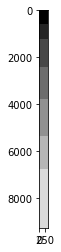

In [353]:
plt.imshow(temp_col_values)

In [315]:
cv2.imwrite('gradient.png', temp_col_values)

True

In [253]:
img = cv2.imread('out1.png', cv2.IMREAD_UNCHANGED)
# b, g, r = cv2.split(img)
# print(b.dtype)
# alpha = np.ones(b.shape).astype(np.uint8)
# img = cv2.merge([r, g, b])

In [251]:
matplotlib.image.imsave('alpha.png', img)

In [252]:
img.shape[1]

360

In [214]:
a = {"insights":[{"scrollPos":0,"endTime":37458},{"scrollPos":582,"endTime":16883},{"scrollPos":1223,"endTime":14337},{"scrollPos":2424,"endTime":481},{"scrollPos":3788,"endTime":417},{"scrollPos":5373,"endTime":417},{"scrollPos":6772,"endTime":516}],"dimensionX":360,"dimensionY":640}

In [14]:
a.keys()

dict_keys(['insights', 'dimensionX', 'dimensionY'])

In [57]:
col_values = np.zeros((img.shape[0], 1))

In [58]:
for item in a['insights']:
    col_values[item['scrollPos']:max((item['scrollPos'] + a['dimensionY']), img.shape[0])] += item['endTime']

In [59]:
max_intensity = np.amax(col_values)

In [60]:
max_intensity

70509.0

In [61]:
col_values /= max_intensity

In [62]:
col_values.resize((col_values.shape[0], 1, 1))

In [63]:
col_values.shape

(9262, 1, 1)

In [78]:
expanded_values = np.repeat(np.repeat(col_values, a['dimensionX'], axis=1), 3, axis=2)

In [211]:
expanded_values[4444][1]

array([ 50, 150,   0], dtype=int32)

In [81]:
# 0, 153, 51
b, g, r = cv2.split(expanded_values)
b = (b * 51.0).astype(int)
g = (g * 153.0).astype(int)
r = (r * 0.0).astype(int)
expanded_values = cv2.merge([r, g, b])

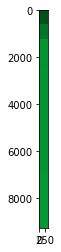

In [82]:
plt.imshow(expanded_values)

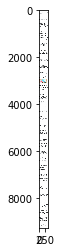

In [138]:
plt.imshow(img)

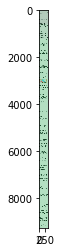

In [137]:
plt.imshow(img)
plt.imshow(expanded_values, alpha=0.3)

In [207]:
foreground = expanded_values.astype(int).copy()
background = img.astype(int).copy()

foreground.resize((foreground.shape[0], foreground.shape[1], 4))
foreground[:,:,0] = 1.0

background.resize((foreground.shape[0], foreground.shape[1], 4))
background[:,:,0] = 1.0

In [190]:
import matplotlib

In [191]:
matplotlib.image.imsave('fore.png', foreground)
matplotlib.image.imsave('back.png', background)

In [192]:
bg = cv2.imread('fore.png', cv2.IMREAD_UNCHANGED)
fg = cv2.imread('back.png', cv2.IMREAD_UNCHANGED)

In [193]:
bg

array([[  0,  81,  27, 255],
       [  0,  81,  27, 255],
       [  0,  81,  27, 255],
       ...,
       [  0,  81,  27, 255],
       [  0,  81,  27, 255],
       [  0,  81,  27, 255]], dtype=uint8)

In [235]:
added = cv2.addWeighted(img, 0.5, expanded_values.astype(np.uint8), 0.5, 0)

In [239]:
alpha, b, g, r = cv2.split(added)
added = cv2.merge([r,g,b,alpha])
matplotlib.image.imsave('final.png', added)

In [220]:

expanded_values = np.repeat(np.repeat(col_values, a['dimensionX'], axis=1), 3, axis=2)

# 0, 153, 51
b, g, r = cv2.split(expanded_values)
b = (b * 51.0).astype(int)
g = (g * 153.0).astype(int)
r = (r * 0.0).astype(int)
alpha = np.ones(r.shape).astype(int)
print(alpha.shape)
print(r.shape)
print(g.shape)
expanded_values = cv2.merge([alpha, b, g, r])

(9262, 360)
(9262, 360)
(9262, 360)


In [219]:
alpha[0][0]

1.0

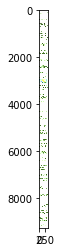

In [181]:
plt.imshow(added)

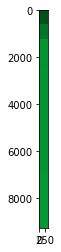

In [149]:
plt.imshow(foreground)

In [127]:
added_image = cv2.addWeighted(background, 0.7, foreground, 0.3, 0)

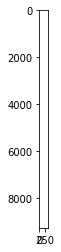

In [128]:
plt.imshow(added_image)

In [135]:
added_image.shape

(9262, 360, 4)

In [136]:
im = Image.fromarray(added_image)
im.save('final.png')

TypeError: Cannot handle this data type

In [5]:
def set_viewport_size(driver, width, height):
    window_size = driver.execute_script("""
        return [window.outerWidth - window.innerWidth + arguments[0],
          window.outerHeight - window.innerHeight + arguments[1]];
        """, width, height)
    driver.set_window_size(*window_size)

In [2]:
from selenium import webdriver

In [17]:
driver = webdriver.Chrome()
driver.get('http://localhost:8000/testrun')
set_viewport_size(driver, 360, 1080)
temp = driver.find_element_by_id('blog_content')
driver.execute_script('''document.getElementById("blog_content").style.backgroundImage = "url('http://localhost:8000/media/gradient.png')"''')
# temp.value_of_css_property['background'] = 'http://localhost:8000/media/gradient.png'
html = temp.get_attribute('innerHTML')

# driver.save_screenshot('driverscreen.png')
# temp.screenshot_as_png('temp.png')
print(dir(temp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_execute', '_id', '_parent', '_upload', '_w3c', 'clear', 'click', 'find_element', 'find_element_by_class_name', 'find_element_by_css_selector', 'find_element_by_id', 'find_element_by_link_text', 'find_element_by_name', 'find_element_by_partial_link_text', 'find_element_by_tag_name', 'find_element_by_xpath', 'find_elements', 'find_elements_by_class_name', 'find_elements_by_css_selector', 'find_elements_by_id', 'find_elements_by_link_text', 'find_elements_by_name', 'find_elements_by_partial_link_text', 'find_elements_by_tag_name', 'find_elements_by_xpath', 'get_attribute', 'get_property', 'id', 'is_displayed', 'is_enabled', 'is_selected', 'location

In [18]:
from bs4 import BeautifulSoup
import requests

In [30]:
page = requests.get('http://localhost:8000/testrun/')
soup = BeautifulSoup(page.content, 'html.parser')

In [31]:
c = soup.find(id='blog_content')

In [39]:
c['style'] += ''';background-image: url('http://localhost:8000/media/gradient.png/');'''

In [40]:
html = soup.prettify('utf-8')
with open('out.html', 'wb') as f:
    f.write(html)

In [ ]:
c[]